In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from google.colab import files
upload=files.upload()

Saving DataCoSupplyChainDataset.csv to DataCoSupplyChainDataset (2).csv


In [74]:
df=pd.read_csv("DataCoSupplyChainDataset.csv", encoding='latin-1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [75]:
df.isnull().sum().sum()

np.int64(336209)

In [76]:
df.drop(columns=["Order Zipcode", "Product Description"], inplace=True)
df.isnull().sum().sum()      #### order zipcode and product description column were completely null thus had to remove it from the data


np.int64(11)

In [77]:
df.dropna(inplace=True)
df.isnull().sum().sum()

np.int64(0)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180508 entries, 0 to 180518
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180508 non-null  object 
 1   Days for shipping (real)       180508 non-null  int64  
 2   Days for shipment (scheduled)  180508 non-null  int64  
 3   Benefit per order              180508 non-null  float64
 4   Sales per customer             180508 non-null  float64
 5   Delivery Status                180508 non-null  object 
 6   Late_delivery_risk             180508 non-null  int64  
 7   Category Id                    180508 non-null  int64  
 8   Category Name                  180508 non-null  object 
 9   Customer City                  180508 non-null  object 
 10  Customer Country               180508 non-null  object 
 11  Customer Email                 180508 non-null  object 
 12  Customer Fname                 1805

### Outlier capping:

In [79]:
for column in df.select_dtypes(include="number").columns:
  Q3=df[column].quantile(0.75)
  Q1=df[column].quantile(0.25)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
df[column]=df[column].clip(lower_limit, upper_limit)

In [80]:
for column in df.select_dtypes(include="number").columns:
  print(column)
  print(df[column].skew())    ## skewness check

Days for shipping (real)
0.08475022722094436
Days for shipment (scheduled)
-0.7319941492412293
Benefit per order
-4.74204978705397
Sales per customer
2.8887722933386866
Late_delivery_risk
-0.19409734510652804
Category Id
0.36143306581217594
Customer Id
0.4885371659965631
Customer Zipcode
0.4909268923831402
Department Id
0.2731151528340977
Latitude
-0.09793750905589517
Longitude
-0.498396088891568
Order Customer Id
0.4885371659965631
Order Id
0.032708400114298805
Order Item Cardprod Id
0.1381944850065614
Order Item Discount
3.040034424238469
Order Item Discount Rate
0.340898600460444
Order Item Id
2.7036971587497268e-05
Order Item Product Price
3.19155003477677
Order Item Profit Ratio
-2.8934720503221154
Order Item Quantity
0.8801600831955025
Sales
2.8845854886476645
Order Item Total
2.8887722933386866
Order Profit Per Order
-4.74204978705397
Product Card Id
0.1381944850065614
Product Category Id
0.36143306581217594
Product Price
3.19155003477677
Product Status
0.0


In [81]:
print("Customer Id has duplicates:", df.duplicated(["Customer Id"]).sum())
print("Order ID has duplicaes:",df.duplicated(["Order Id"]).sum())
print("Oreder Item Id is unique no duplicates present:",df.duplicated(["Order Item Id"]).sum())

Customer Id has duplicates: 159867
Order ID has duplicaes: 114767
Oreder Item Id is unique no duplicates present: 0


## SQlite connection and database formation

In [82]:

connect=sqlite3.connect("supply_chain.db")
cursor=connect.cursor()

# Created a table named 'supply_chain' from the DataFrame
df.to_sql("supply_chain", connect, if_exists="replace", index=False)

# Query data from the table
query = "SELECT * FROM supply_chain;"
result = pd.read_sql_query(query, connect)


result.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastán,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [83]:
df["order date (DateOrders)"]

,order date (DateOrders)
0,1/31/2018 22:56
1,1/13/2018 12:27
2,1/13/2018 12:06
3,1/13/2018 11:45
4,1/13/2018 11:24
...,...
180514,1/16/2016 3:40
180515,1/16/2016 1:34
180516,1/15/2016 21:00
180517,1/15/2016 20:18


In [84]:
query = 'SELECT "order date (DateOrders)" AS order_date, "Sales" FROM supply_chain;'
date_sales = pd.read_sql_query(query, connect)
date_sales.head()

,order_date,Sales
0,1/31/2018 22:56,327.75
1,1/13/2018 12:27,327.75
2,1/13/2018 12:06,327.75
3,1/13/2018 11:45,327.75
4,1/13/2018 11:24,327.75


## Monthly trend analysis

In [85]:

date_sales["order_date"] = pd.to_datetime(date_sales["order_date"], format="%m/%d/%Y %H:%M", errors="coerce")  ###datetime format conversion from order date



# Group by month and sum total sales
date_sales["year_month"] = date_sales["order_date"].dt.to_period("M").astype(str)
date_sales
monthly_sales = date_sales.groupby("year_month")["Sales"].sum().reset_index()
monthly_sales.head()

,year_month,Sales
0,2015-01,1.051590e+06
1,2015-02,9.270099e+05
2,2015-03,1.051254e+06
3,2015-04,1.014463e+06
4,2015-05,1.050478e+06


/tmp/ipython-input-4229501399.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=monthly_sales["year_month"], y=monthly_sales["Sales"], palette="plasma")


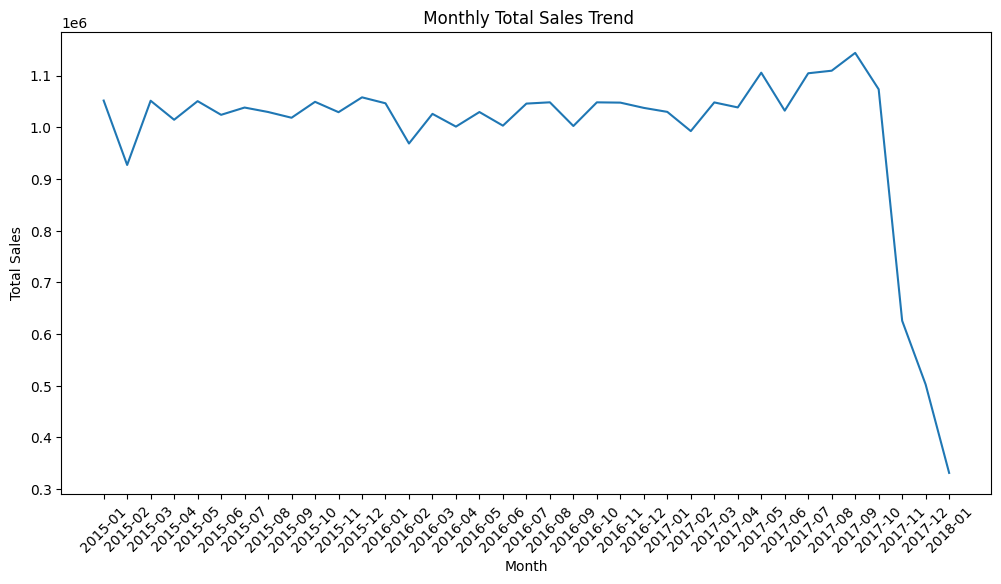

In [86]:

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales["year_month"], y=monthly_sales["Sales"], palette="plasma")
plt.title(" Monthly Total Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


### Top products that contributing the revenue

In [87]:
query = """
SELECT "Product Name", SUM("Order Item Total") AS revenue
FROM supply_chain
GROUP BY "Product Name"
ORDER BY revenue DESC
LIMIT 10;
"""
df_top_products = pd.read_sql_query(query, connect)
df_top_products
                                ### Field & Stream Sportsman 16 Gun Fire Safe ahs the higest contribution in the revenue which is	6.226935e+06

,Product Name,revenue
0,Field & Stream Sportsman 16 Gun Fire Safe,6.226935e+06
1,Perfect Fitness Perfect Rip Deck,3.973180e+06
2,Diamondback Women's Serene Classic Comfort Bi,3.700784e+06
3,Nike Men's Free 5.0+ Running Shoe,3.295693e+06
4,Nike Men's Dri-FIT Victory Golf Polo,2.828708e+06
5,Pelican Sunstream 100 Kayak,2.785518e+06
6,Nike Men's CJ Elite 2 TD Football Cleat,2.598494e+06
7,O'Brien Men's Neoprene Life Vest,2.596454e+06
8,Under Armour Girls' Toddler Spine Surge Runni,1.140771e+06
9,Dell Laptop,5.953950e+05


/tmp/ipython-input-2527932190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df_top_products['revenue'], y=df_top_products['Product Name'], palette="viridis")


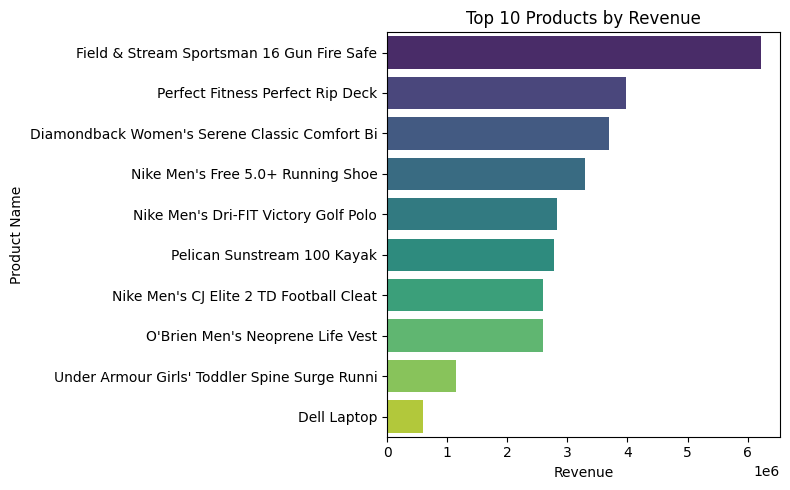

In [88]:
plt.figure(figsize=(8,5))
sns.barplot( x=df_top_products['revenue'], y=df_top_products['Product Name'], palette="viridis")
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.tight_layout()
plt.show()

### Top department by average profit

/tmp/ipython-input-4084553468.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_dept['avg_profit'], y=df_dept['Department Name'], palette="magma")


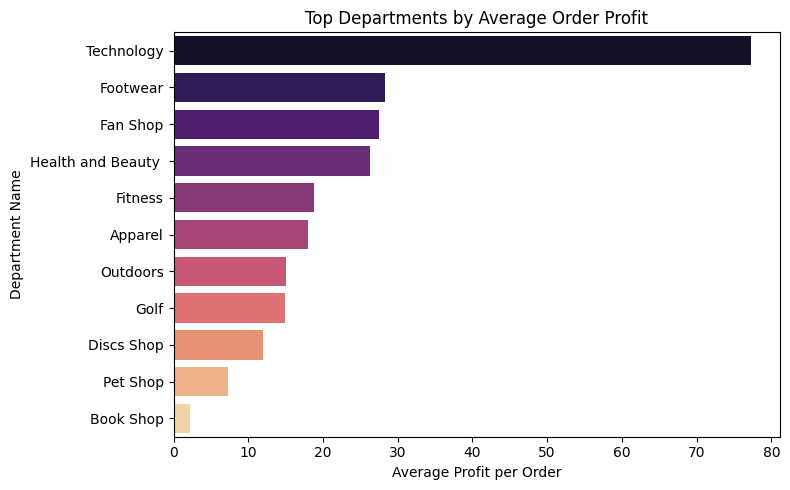

In [89]:
query = """
SELECT "Department Name",
    AVG("Order Profit Per Order") AS avg_profit,
    SUM("Order Profit Per Order") AS total_profit,
    COUNT("Department Name") AS count
FROM supply_chain
GROUP BY "Department Name"
ORDER BY avg_profit DESC
LIMIT 15;
"""
df_dept = pd.read_sql_query(query, connect)
plt.figure(figsize=(8,5))
sns.barplot(x=df_dept['avg_profit'], y=df_dept['Department Name'], palette="magma")
plt.title('Top Departments by Average Order Profit')
plt.xlabel('Average Profit per Order')
plt.tight_layout()
plt.show()                                         ### techonology has the highest average profit


## Top country based on total sales  

In [90]:
query = """
SELECT "Customer Country" AS country, SUM("Sales") AS total_sales
FROM supply_chain
GROUP BY country
ORDER BY total_sales DESC;
"""
df_country = pd.read_sql_query(query, connect)
df_country
                                                            ### EE. UU. has highest total_sales

,country,total_sales
0,EE. UU.,2.263163e+07
1,Puerto Rico,1.414967e+07


## Average shipping days by shipping



In [91]:

query = """
SELECT "Shipping Mode",
       AVG("Days for shipping (real)") AS avg_days_real,
       AVG("Order Item Total") AS avg_order_value,
       COUNT(*) AS n_orders
FROM supply_chain
GROUP BY "Shipping Mode"
ORDER BY avg_days_real;
"""
df_shipmode = pd.read_sql_query(query, connect)
df_shipmode                                                     ### standard class has the highest number of orders and its takes more days to ship (4 days).
                                                                ### while first class shipping takes 2 days.


,Shipping Mode,avg_days_real,avg_order_value,n_orders
0,Same Day,0.478279,179.234007,9737
1,First Class,2.000000,183.376498,27812
2,Second Class,3.990884,182.199960,35214
3,Standard Class,3.995935,183.675092,107745


/tmp/ipython-input-2559941839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_shipmode, x='avg_days_real', y='Shipping Mode', palette="viridis")


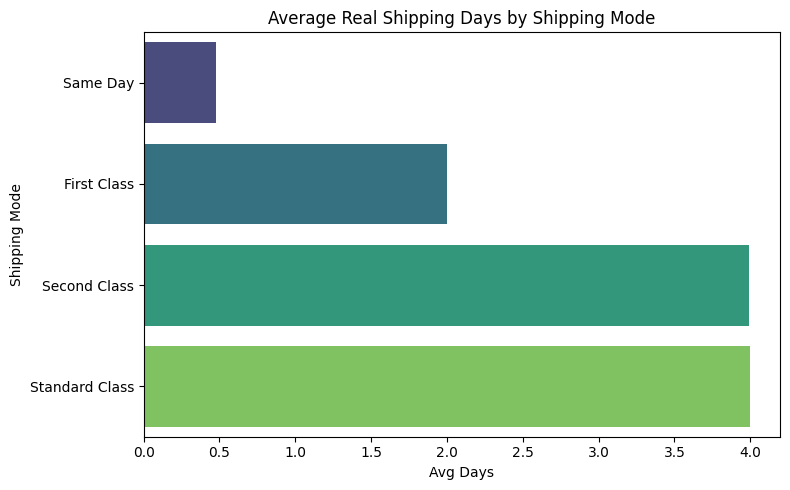

In [92]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_shipmode, x='avg_days_real', y='Shipping Mode', palette="viridis")
plt.title('Average Real Shipping Days by Shipping Mode')
plt.xlabel('Avg Days')
plt.tight_layout()
plt.show()

## Delay percentage by shipping modes

In [93]:
query_delivery = """
SELECT "Shipping Mode",
    AVG("Days for shipping (real)" - "Days for shipment (scheduled)") AS avg_delay,
    SUM(CASE WHEN "Days for shipping (real)" > "Days for shipment (scheduled)"
        THEN 1 ELSE 0 END) AS delayed_orders,
    COUNT(*) AS total_orders,
    AVG("Days for shipping (real)") AS avg_real_days,
    AVG("Days for shipment (scheduled)") AS avg_scheduled_days
FROM supply_chain
GROUP BY "Shipping Mode"
ORDER BY avg_delay DESC
"""
df_delivery = pd.read_sql_query(query_delivery, connect)
df_delivery



,Shipping Mode,avg_delay,delayed_orders,total_orders,avg_real_days,avg_scheduled_days
0,Second Class,1.990884,28077,35214,3.990884,2.0
1,First Class,1.000000,27812,27812,2.000000,1.0
2,Same Day,0.478279,4657,9737,0.478279,0.0
3,Standard Class,-0.004065,42849,107745,3.995935,4.0


In [94]:
# Calculate delay percentage
df_delivery['delay_percentage'] = (df_delivery['delayed_orders'] / df_delivery['total_orders'] * 100).round(2)
# print(" Delivery Performance Summary:")
print(df_delivery.to_string(index=False))

                                                                                       ### standard class has lowest delay percentage(39.77)
                                                                                       ### fisrt class has highest delay percentage (100)

 Shipping Mode  avg_delay  delayed_orders  total_orders  avg_real_days  avg_scheduled_days  delay_percentage
  Second Class   1.990884           28077         35214       3.990884                 2.0             79.73
   First Class   1.000000           27812         27812       2.000000                 1.0            100.00
      Same Day   0.478279            4657          9737       0.478279                 0.0             47.83
Standard Class  -0.004065           42849        107745       3.995935                 4.0             39.77


/tmp/ipython-input-2097416339.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_delivery, x='Shipping Mode', y="delay_percentage", palette='inferno')
/tmp/ipython-input-2097416339.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


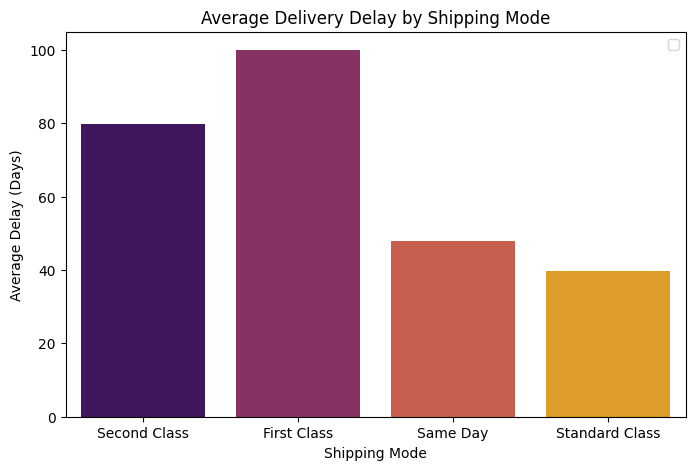

In [95]:
# Visualization 1: delay percentage by Shipping Mode
plt.figure(figsize=(8, 5))
sns.barplot(data=df_delivery, x='Shipping Mode', y="delay_percentage", palette='inferno')
plt.title("Average Delivery Delay by Shipping Mode")
plt.ylabel('Average Delay (Days)')
plt.xlabel('Shipping Mode')
plt.legend()
plt.show()

## Customer segments sales analysis

In [96]:
query = """
SELECT "Customer Segment",
       COUNT(DISTINCT "Customer Id") AS n_customers,
       SUM("Sales") AS total_sales,
       AVG("Sales") AS avg_sales_per_record
FROM supply_chain
GROUP BY "Customer Segment"
ORDER BY total_sales DESC;
"""
df_seg = pd.read_sql_query(query, connect)
df_seg


,Customer Segment,n_customers,total_sales,avg_sales_per_record
0,Consumer,10692,1.909472e+07,204.219406
1,Corporate,6234,1.116687e+07,203.834536
2,Home Office,3715,6.519712e+06,202.331012


/tmp/ipython-input-19697234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df_seg['total_sales'], y=df_seg['Customer Segment'], palette="plasma")    ### consumer segment has highest contribution in sales


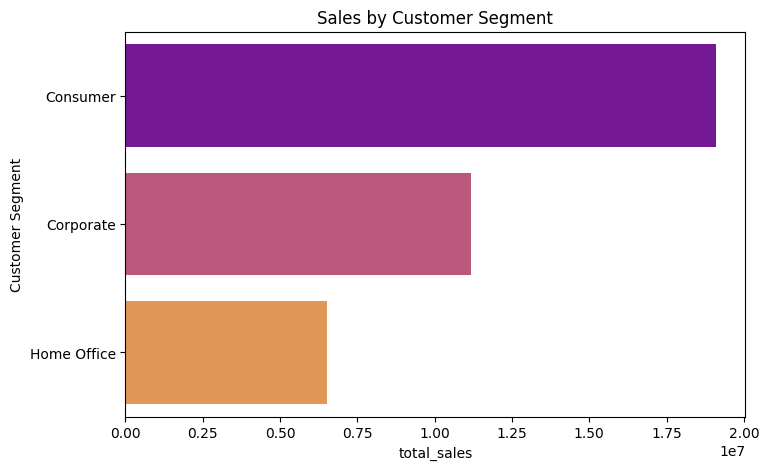

In [97]:
plt.figure(figsize=(8,5))
sns.barplot( x=df_seg['total_sales'], y=df_seg['Customer Segment'], palette="plasma")    ### consumer segment has highest contribution in sales
plt.title('Sales by Customer Segment')
plt.show()

### Top 10 customers by total sales

/tmp/ipython-input-1536800067.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_customers, y='total_sales', x='Customer Id', palette="plasma")


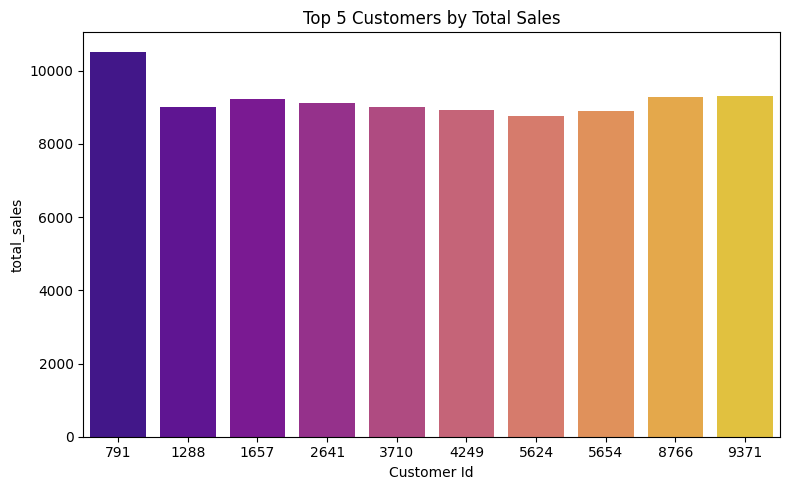

In [98]:
query = """
SELECT "Customer Id", "Customer Fname", "Customer Lname",
       SUM("Sales") AS total_sales,
       COUNT(DISTINCT "Order Id") AS n_orders
FROM supply_chain
GROUP BY "Customer Id"
ORDER BY total_sales DESC
LIMIT 10;
"""
df_top_customers = pd.read_sql_query(query, connect)                      # Customer ID 791 has highest total sales
plt.figure(figsize=(8,5))
sns.barplot(data=df_top_customers, y='total_sales', x='Customer Id', palette="plasma")
plt.title('Top 5 Customers by Total Sales')
plt.tight_layout()
plt.show()


### Order Status Distribution

In [99]:
query = """
SELECT "Order Status", COUNT("Order Status") AS status
FROM supply_chain
GROUP BY "Order Status"
ORDER BY status DESC;
"""
df_status = pd.read_sql_query(query, connect)
df_status
                                                        ### most of the order count has been completed to be extact 59487 orders has been completed.
                                                        ### 1893 orders are in payment review, 9803 orders are in on hold and 20224 orders are pending.

,Order Status,status
0,COMPLETE,59487
1,PENDING_PAYMENT,39829
2,PROCESSING,21902
3,PENDING,20224
4,CLOSED,19616
5,ON_HOLD,9803
6,SUSPECTED_FRAUD,4062
7,CANCELED,3692
8,PAYMENT_REVIEW,1893


/tmp/ipython-input-745298214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_status['status'], y=df_status['Order Status'], palette="viridis")


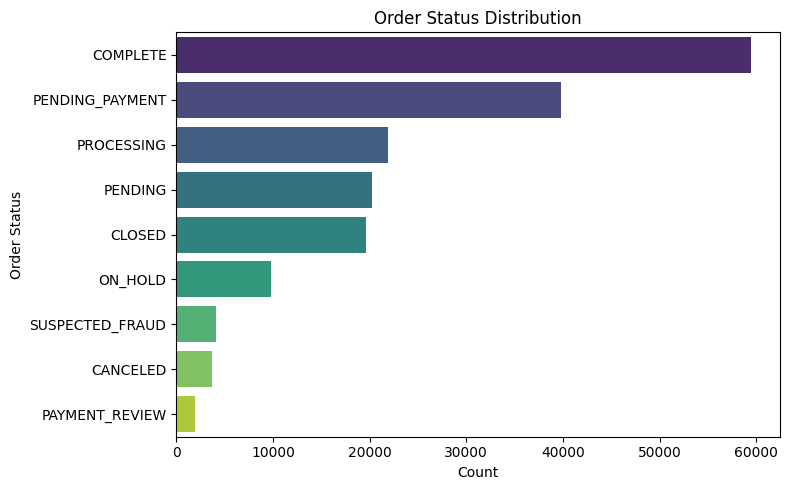

In [100]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_status['status'], y=df_status['Order Status'], palette="viridis")
plt.title('Order Status Distribution')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


## Top 10 category name based on order item total value







In [101]:
query = """
SELECT "Category Name",
       AVG("Order Item Total") AS avg_order_value,
       SUM("Order Item Total") AS total_value,
       COUNT(*) AS n_items
FROM supply_chain
GROUP BY "Category Name"
ORDER BY total_value DESC
LIMIT 10;
"""
df_cat = pd.read_sql_query(query, connect)
df_cat.head(10)                                        ### fishing category has the highest order item total


,Category Name,avg_order_value,total_value,n_items
0,Fishing,359.419064,6.226935e+06,17325
1,Cleats,162.227873,3.982857e+06,24551
2,Camping & Hiking,269.559591,3.700784e+06,13729
3,Cardio Equipment,265.896588,3.320251e+06,12487
4,Women's Apparel,134.476278,2.828708e+06,21035
5,Water Sports,180.054323,2.798044e+06,15540
6,Men's Footwear,116.807265,2.598494e+06,22246
7,Indoor/Outdoor Games,134.545239,2.596454e+06,19298
8,Shop By Sport,107.172763,1.177186e+06,10984
9,Computers,1347.047511,5.953950e+05,442


/tmp/ipython-input-3068354038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_cat['total_value'], y=df_cat['Category Name'], palette="inferno")


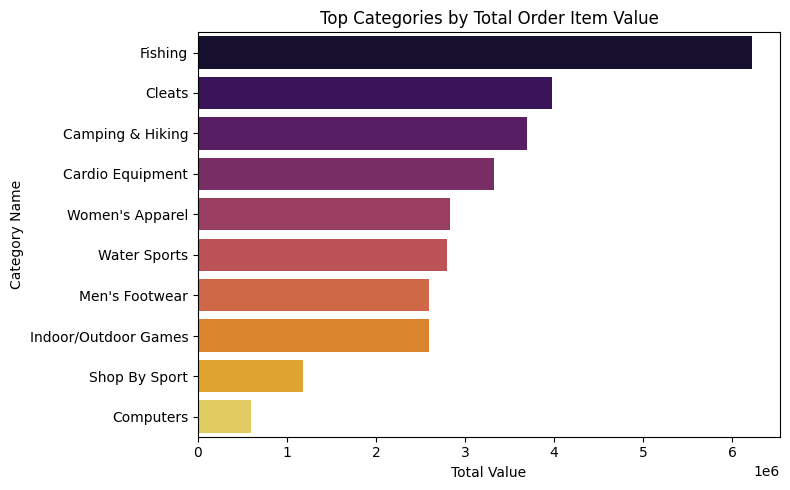

In [102]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_cat['total_value'], y=df_cat['Category Name'], palette="inferno")
plt.title('Top Categories by Total Order Item Value')
plt.xlabel('Total Value')
plt.tight_layout()
plt.show()

### Geographical distribution of orders

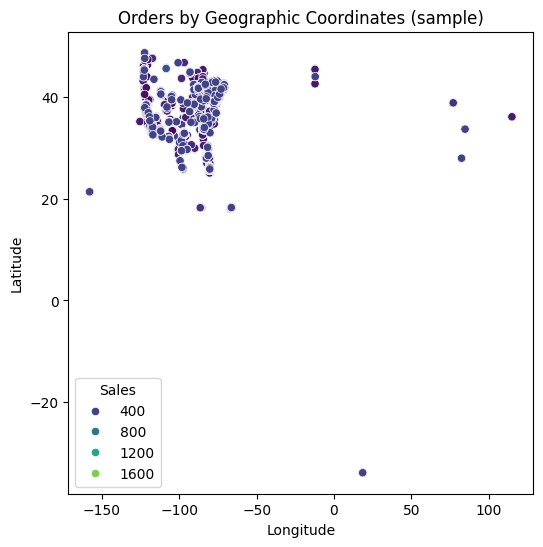

In [103]:
query = """
SELECT "Latitude", "Longitude", "Sales"
FROM supply_chain
WHERE "Latitude" IS NOT NULL AND "Longitude" IS NOT NULL
"""
df_geo = pd.read_sql_query(query, connect)
plt.figure(figsize=(6,6))
sns.scatterplot(x=df_geo['Longitude'], y=df_geo['Latitude'], hue=df_geo["Sales"], palette="viridis")
plt.title('Orders by Geographic Coordinates (sample)')
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.show()

                                                                                 ### most of the orders came from longitude, latitude (-100,40)


## Top 20 customers by Total Quantity Purchased

In [104]:
query="""select count("Order Item ID") as order_item_count, sum("Order Item Quantity") as total_item_quant,
"Customer ID" from supply_chain group by "Customer ID" order by order_item_count desc limit 20;"""

item_count=pd.read_sql_query(query, connect)
item_count                                                         #customer id 5004 has highest total intem quantity and while 5654 has highest order item counts.

,order_item_count,total_item_quant,Customer Id
0,47,103,5654
1,45,99,10591
2,45,114,5004
3,44,87,9371
4,44,99,5715
5,44,82,3708
6,43,110,12284
7,43,90,2641
8,43,86,1443
9,43,82,791


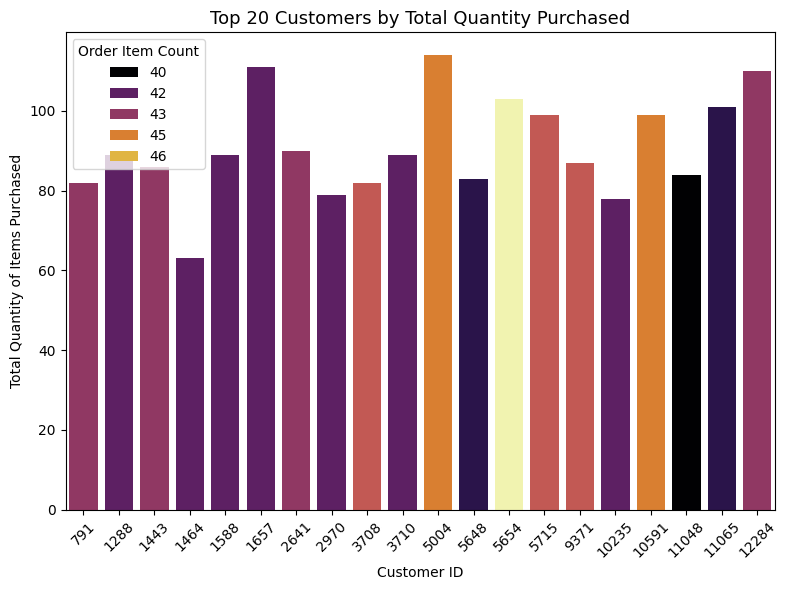

In [105]:
plt.figure(figsize=(8,6))

sns.barplot(
    data=item_count,
    x='Customer Id',
    y='total_item_quant',
    hue='order_item_count',
    palette='inferno'
)

plt.title('Top 20 Customers by Total Quantity Purchased', fontsize=13)
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity of Items Purchased')
plt.xticks(rotation=45)
plt.legend(title='Order Item Count')
plt.tight_layout()
plt.show()


## Cutomer ID and its number of orders

In [106]:
query_counts = """
-- number of distinct orders per customer
SELECT distinct
  "customer Id" AS customer_id,
  count(distinct "Order Id") AS n_orders
FROM supply_chain
GROUP BY "Customer Id";
"""
cust_counts = pd.read_sql_query(query_counts, connect)
cust_counts.head()


,customer_id,n_orders
0,1,1
1,2,4
2,3,5
3,4,4
4,5,3


/tmp/ipython-input-3881681082.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cust_counts["n_orders"], y=cust_counts["customer_id"], palette='viridis')


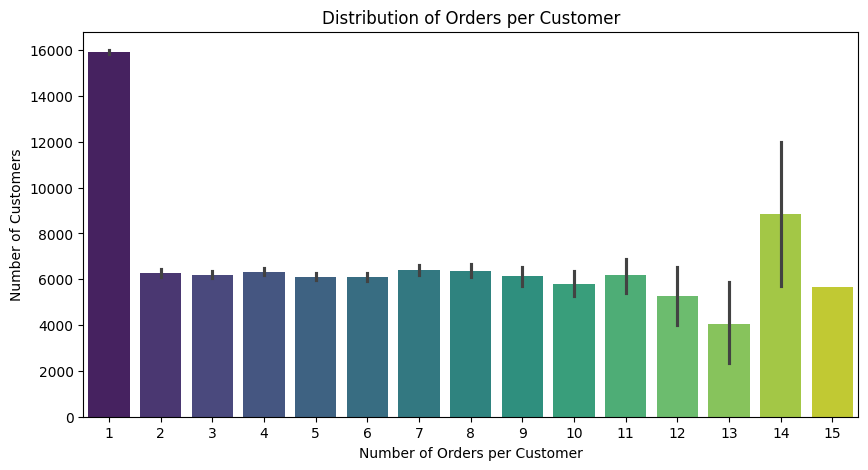

In [107]:


plt.figure(figsize=(10,5))
sns.barplot(x=cust_counts["n_orders"], y=cust_counts["customer_id"], palette='viridis')
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders per Customer')
plt.show()                                            ### majority of the customer gives single order rather multiple.


In [108]:
query_repeat = """
SELECT
  SUM(CASE WHEN n_orders > 1 THEN 1 ELSE 0 END) * 100 / COUNT(*) AS repeat_rate_percentage,
  SUM(CASE WHEN n_orders > 1 THEN 1 ELSE 0 END) AS n_repeat_customers,
  COUNT(*) AS total_customers
FROM (
  SELECT COUNT(DISTINCT "Order Id") AS n_orders
  FROM supply_chain
  GROUP BY "Customer Id"
);
"""
repeat_stats = pd.read_sql_query(query_repeat, connect)

repeat_stats                                                         ### 57 % customer were repeated customer.
                                                                     ### total customer were 20641 among them repeat customers were 11768


,repeat_rate_percentage,n_repeat_customers,total_customers
0,57,11768,20641


In [109]:
query_dist = """
SELECT n_orders, COUNT(*) AS n_customers
FROM (
  SELECT "Customer Id", COUNT(DISTINCT "Order Id") AS n_orders
  FROM supply_chain
  GROUP BY "Customer Id"
)
GROUP BY n_orders
ORDER BY n_orders;
"""
dist = pd.read_sql_query(query_dist, connect)
dist.head(4)                                            #### majority of cutsomer were orderd for 1 order.


,n_orders,n_customers
0,1,8873
1,2,1363
2,3,1988
3,4,2324


/tmp/ipython-input-1175715823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist["n_orders"], y=dist["n_customers"], palette='viridis')


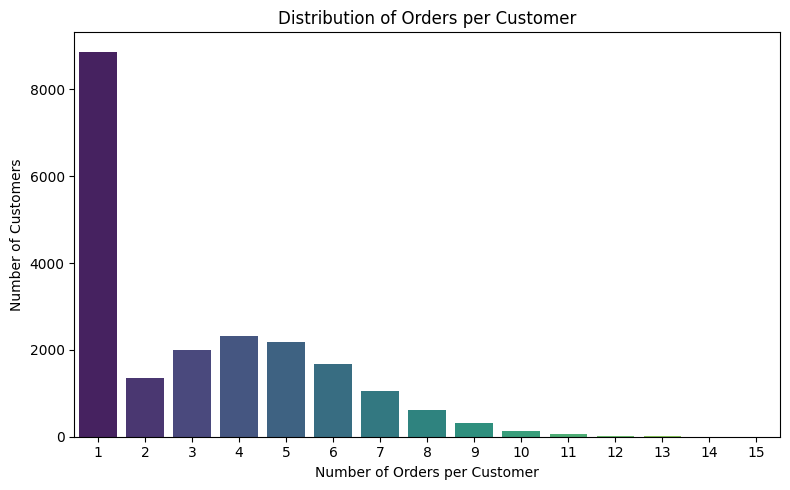

In [110]:


plt.figure(figsize=(8,5))
sns.barplot(x=dist["n_orders"], y=dist["n_customers"], palette='viridis')
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders per Customer')
plt.tight_layout()
plt.show()


## Profit margins based on order volumes

In [111]:
query = '''
SELECT "Order Id",
       SUM("Order Item Quantity") AS order_volume,
       SUM("Order Profit Per Order") AS order_profit
FROM supply_chain
GROUP BY "Order Id";
'''
df_order = pd.read_sql_query(query, connect)
df_order.head()

                                                            ### as the number of  order item quantity increases the profit margin aslo increases.

,Order Id,order_volume,order_profit
0,1,1,88.790001
1,2,7,195.900002
2,4,14,124.090000
3,5,10,390.089995
4,7,7,203.929998


In [112]:
Q3=df_order["order_volume"].quantile(0.75)             ### removing outliers from the data
Q1=df_order["order_volume"].quantile(0.25)
IQR_v=Q3-Q1

low_vol=Q1-IQR_v*1.5
high_vol=Q3+IQR_v*1.5

Q3_p=df_order["order_profit"].quantile(0.75)
Q1_p=df_order["order_profit"].quantile(0.25)
IQR_P=Q3_p -Q1_p
low_profit=Q1-IQR_P*1.5
high_profit=Q3=IQR_P*1.5

filtered=df_order[(df_order["order_volume"].between(low_vol, high_vol))&(df_order["order_profit"].between(low_profit,high_profit))]

/tmp/ipython-input-198712264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered['order_volume'], y=filtered['order_profit'], palette="inferno")


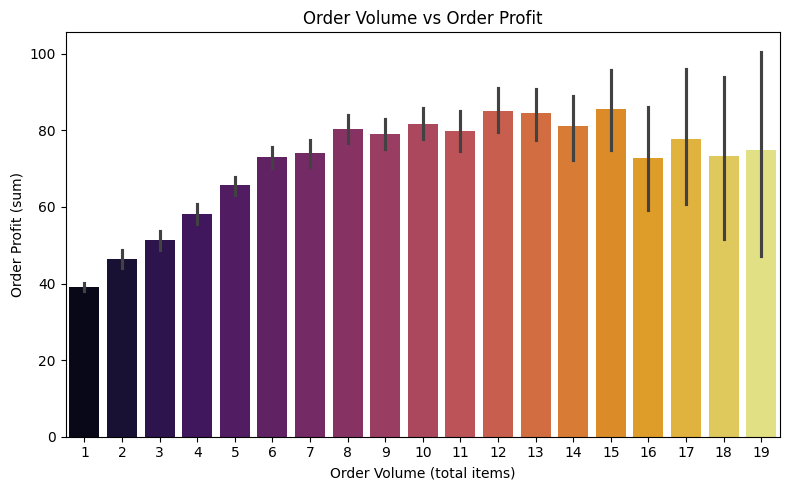

In [113]:
plt.figure(figsize=(8,5))
sns.barplot(x=filtered['order_volume'], y=filtered['order_profit'], palette="inferno")
plt.xlabel('Order Volume (total items)')
plt.ylabel('Order Profit (sum)')
plt.title('Order Volume vs Order Profit')
plt.tight_layout()
plt.show()


In [114]:
query = '''
SELECT "Customer Country", "Product Name", SUM("Sales") AS total_sales
FROM supply_chain
GROUP BY "Customer Country", "Product Name"
ORDER BY "Customer ountry", total_sales DESC;
'''
df_prod_country = pd.read_sql_query(query, connect)
df_prod_country.head(5)



,Customer Country,Product Name,total_sales
0,EE. UU.,Field & Stream Sportsman 16 Gun Fire Safe,4.257387e+06
1,EE. UU.,Perfect Fitness Perfect Rip Deck,2.714248e+06
2,Puerto Rico,Field & Stream Sportsman 16 Gun Fire Safe,2.672266e+06
3,EE. UU.,Diamondback Women's Serene Classic Comfort Bi,2.566629e+06
4,EE. UU.,Nike Men's Free 5.0+ Running Shoe,2.258474e+06


## Short summary of KPIs:

In [115]:
df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastán,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [116]:
repeat_rate = repeat_stats.loc[0, 'repeat_rate_percentage'] / 100
print("Executive Summary")
print(f"• Total Orders: {df['Order Id'].sum():,.2f}")
print(f"• Total Sales: ${df['Sales'].sum():,.2f}")
print(f"• Avg Profit per Order: ${df['Order Profit Per Order'].mean():.2f}")
print(f"• Repeat Purchase Rate: {repeat_rate:.2%}")
print(f"• Avg Delivery Delay: {df['Days for shipping (real)'].mean():.1f} days")

Executive Summary
• Total Orders: 6,537,937,304.00
• Total Sales: $36,781,302.12
• Avg Profit per Order: $21.97
• Repeat Purchase Rate: 57.00%
• Avg Delivery Delay: 3.5 days


### Cohort Analysis (Distribution of days to second purchase)

In [117]:
# Get customer orders with dates
query_cohort = """
SELECT
    "Customer Id" AS customer_id,
    "Order Id" AS order_id,
    "order date (DateOrders)" AS order_date,
    "Sales" AS sales
FROM supply_chain
ORDER BY customer_id, order_date
"""
df_cohort = pd.read_sql_query(query_cohort, connect)
df_cohort

# # Convert to datetime
df_cohort['order_date'] = pd.to_datetime(df_cohort['order_date'], format="%m/%d/%Y %H:%M", errors='coerce')

# # Get first and subsequent orders for each customer
df_first_order = df_cohort.groupby('customer_id')['order_date'].min().reset_index()
df_first_order

df_first_order.columns = ['customer_id', 'first_order_date']

# Merge to get days since first order
df_cohort = df_cohort.merge(df_first_order, on='customer_id')
df_cohort['days_since_first_order'] = (df_cohort['order_date'] - df_cohort['first_order_date']).dt.days

# Get order number for each customer
df_cohort['order_number'] = df_cohort.groupby('customer_id').cumcount() + 1

# Analysis: Time between orders
df_repeat = df_cohort[df_cohort['order_number'] >= 2].copy()
df_second_order = df_cohort[df_cohort['order_number'] == 2].copy()

if len(df_second_order) > 0:
    print(" Time to Second Purchase:")
    print(f"   • Average days to 2nd order: {df_second_order['days_since_first_order'].mean():.1f} days")
    print(f"   • Median days to 2nd order: {df_second_order['days_since_first_order'].median():.1f} days")
    print(f"   • Min: {df_second_order['days_since_first_order'].min():.0f} days")
    print(f"   • Max: {df_second_order['days_since_first_order'].max():.0f} days")



 Time to Second Purchase:
   • Average days to 2nd order: 248.8 days
   • Median days to 2nd order: 207.0 days
   • Min: 0 days
   • Max: 979 days


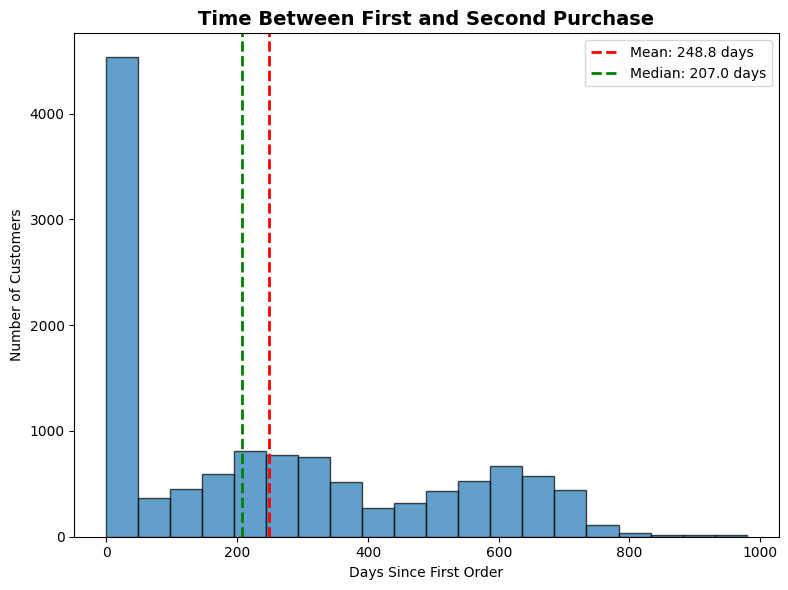

In [118]:
    # Visualization: Distribution of days to second purchase
    plt.figure(figsize=(8, 6))
    plt.hist(df_second_order['days_since_first_order'], bins=20, edgecolor='black', alpha=0.7)
    plt.axvline(df_second_order['days_since_first_order'].mean(), color='red',
                linestyle='--', linewidth=2, label=f'Mean: {df_second_order["days_since_first_order"].mean():.1f} days')
    plt.axvline(df_second_order['days_since_first_order'].median(), color='green',
                linestyle='--', linewidth=2, label=f'Median: {df_second_order["days_since_first_order"].median():.1f} days')
    plt.title('Time Between First and Second Purchase', fontsize=14, fontweight='bold')
    plt.xlabel('Days Since First Order')
    plt.ylabel('Number of Customers')
    plt.legend()
    plt.tight_layout()
    plt.show()


## Statistical analysis of Shipping mode and delivery days real

Average delivery days by shipping mode:
                mean   count   std
Shipping Mode                     
First Class     2.00   27812  0.00
Same Day        0.48    9737  0.50
Second Class    3.99   35214  1.42
Standard Class  4.00  107745  1.42


/tmp/ipython-input-1655218823.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Shipping Mode', y='Days for shipping (real)', palette='Set2')


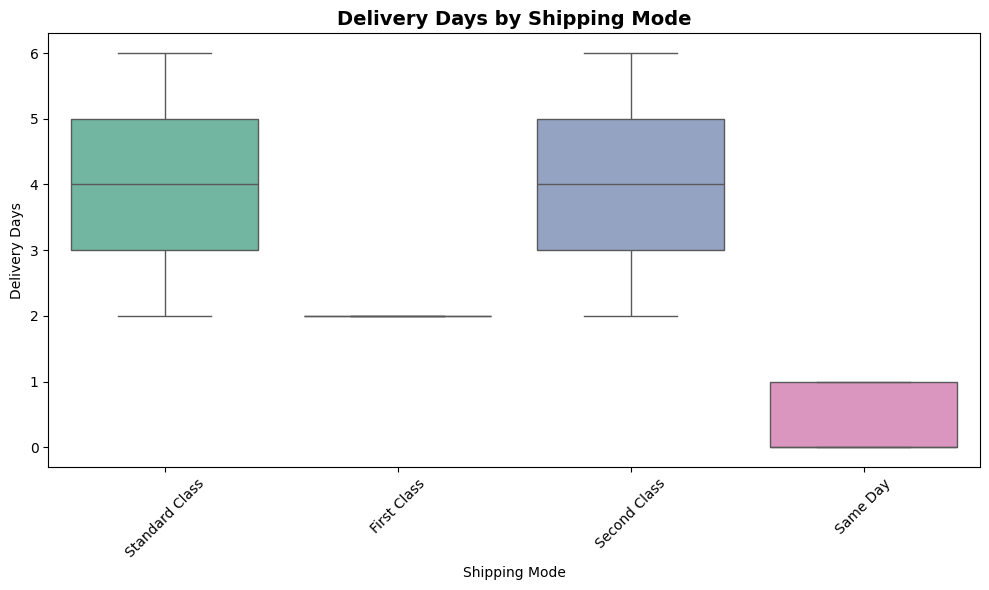

In [119]:
# Calculate averages for each shipping mode
averages = df.groupby('Shipping Mode')['Days for shipping (real)'].agg(['mean', 'count', 'std'])
print("Average delivery days by shipping mode:")
print(averages.round(2))

# Visualize the differences
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Shipping Mode', y='Days for shipping (real)', palette='Set2')
plt.title('Delivery Days by Shipping Mode', fontsize=14, fontweight='bold')
plt.ylabel('Delivery Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### ANOVA

In [120]:
import scipy.stats as stats

# Now runing the statistical test

# Split data by shipping mode
mode1 = df[df['Shipping Mode'] == 'Standard Class']['Days for shipping (real)']
mode2 = df[df['Shipping Mode'] == 'First Class']['Days for shipping (real)']
mode3 = df[df['Shipping Mode'] == 'Second Class']['Days for shipping (real)']
mode4 = df[df['Shipping Mode'] == 'Same Day']['Days for shipping (real)']

# Run ANOVA
f_stat, p_value = stats.f_oneway(mode1, mode2, mode3, mode4)


print(f"  F-statistic: {f_stat:.2f}")
print(f"  P-value: {p_value:.6f}")

# Interpret the result

if p_value < 0.05:
    print("  YES! The differences ARE statistically significant")
    print("  The shipping modes have REALLY different delivery times")
    print("  This is not just random variation")
else:
    print("  NO! The differences are NOT statistically significant")
    print("  The shipping modes might have similar delivery times")
    print("  Differences could be due to random chance")

  F-statistic: 38761.68
  P-value: 0.000000
  YES! The differences ARE statistically significant
  The shipping modes have REALLY different delivery times
  This is not just random variation


### T test

In [121]:
# Run this to see WHICH modes are different
from itertools import combinations

modes = df['Shipping Mode'].unique()

print("Pairwise Comparisons:")
print("-" * 50)

for mode_a, mode_b in combinations(modes, 2):
    data_a = df[df['Shipping Mode'] == mode_a]['Days for shipping (real)']
    data_b = df[df['Shipping Mode'] == mode_b]['Days for shipping (real)']

    t_stat, p_val = stats.ttest_ind(data_a, data_b)

    diff = (data_a.mean() - data_b.mean())
   # Significance marker
    sig = (
        "***" if p_val < 0.001 else
        "**"  if p_val < 0.01 else
        "*"   if p_val < 0.05 else
        "ns"
    )

    print(f"{mode_a:20s} vs {mode_b:20s}: {diff:5.2f} days | {sig}")

Pairwise Comparisons:
--------------------------------------------------
Standard Class       vs First Class         :  2.00 days | ***


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Standard Class       vs Second Class        :  0.01 days | ns
Standard Class       vs Same Day            :  3.52 days | ***
First Class          vs Second Class        : -1.99 days | ***
First Class          vs Same Day            :  1.52 days | ***
Second Class         vs Same Day            :  3.51 days | ***


In [122]:
df.to_csv("supply_chain_clean.csv.gz", index=False, compression="gzip")
